# Guia 1 ejercicio 3


La Botella 1 tiene un llenado de 0.81
La Botella 2 tiene un llenado de 0.83
La Botella 3 tiene un llenado de 0.65
La Botella 4 tiene un llenado de 0.82
La Botella 5 tiene un llenado de 0.82


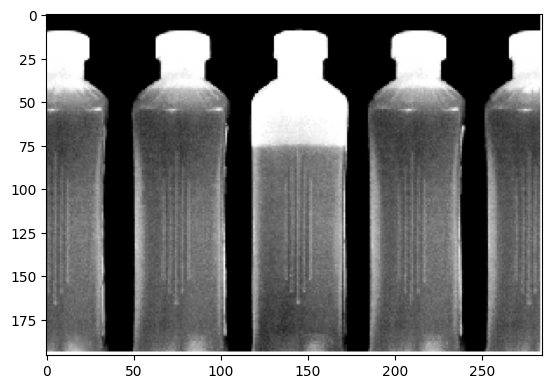

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

botellas = cv.imread(r"C:\Users\pablo\Desktop\PDI\PDI\Imagenes\botellas.tif", cv.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(botellas,cmap='gray')
'''plt.plot([0,botellas.shape[1]],[(botellas.shape[0] / 2),(botellas.shape[0] / 2)])
plt.figure()
plt.plot(botellas[int((botellas.shape[0] / 2)),:])'''

##Idenfiticar posiciones de botellas
lineahorizontal = botellas[int((botellas.shape[0] / 2)) , :]
colbotellas = [] #Arreglo que tiene col donde empieza y termina cada botella
flag = True
for i in range(len(lineahorizontal)):
    if  flag and lineahorizontal[i] != 0:
        colbotellas.append(i)
        flag = False
    if (not flag) and lineahorizontal[i] == 0:
        colbotellas.append(i)
        flag = True
colbotellas.append(botellas.shape[1])
#Calculo altura de botella
lineavertical = botellas[: , int((colbotellas[1] - colbotellas[0])/2)]
altura = []
for i in range(len(lineavertical)):
    if lineavertical[i] != 0:
        altura.append(i+1)
        break
altura.append(botellas.shape[0])

llenado = [] #Arreglo que guarda la pos donde aparece el primer gris en cada botella
for i in range(0,10,2):
    col = colbotellas[i] + int((colbotellas[i+1] - colbotellas[i])/2)
    lineavertical = botellas[altura[0]: , col]
    for i in range(len(lineavertical)):
        if lineavertical[i] < 200 and lineavertical[i] > 50:
            llenado.append(i)
            break

alt = (altura[1]-altura[0])
for i in range(5):
    print(f"La Botella {i+1} tiene un llenado de { (alt - llenado[i]) / alt :.2f}")
plt.show()

El código analiza una imagen en escala de grises de varias botellas para estimar su nivel de llenado.
Primero, extrae una línea horizontal a la mitad de la imagen y recorre sus píxeles para identificar las posiciones de inicio y fin de cada botella, basándose en la transición de negro (fondo) a gris (botella) y viceversa.
Luego, calcula el centro de cada botella a partir de esas posiciones y, en cada centro, extrae una línea vertical.
A partir de esta línea vertical, detecta el primer píxel cuyo valor de gris corresponde al contenido líquido, utilizando un rango de intensidad (gris intermedio).
Finalmente, calcula el porcentaje de llenado de cada botella como el cociente entre la altura ocupada por el líquido y la altura total de la botella.

# Guia 2 ejercicio 4.2

In [ ]:
import numpy as np
import cv2 as cv
from PIL import Image

# Calcular distancia (error absoluto)
def calcular_error(img1, img2):
    return np.sum(np.abs(img1.astype(np.int16) - img2.astype(np.int16)))
    
# Abrir el .gif con PIL
a7_x = Image.open(r"C:\Users\pablo\Desktop\PDI\PDI\Imagenes\a7v600-X.gif")
a7_xRuido = Image.open(r"C:\Users\pablo\Desktop\PDI\PDI\Imagenes\a7v600-X(RImpulsivo).gif")
a7_se = Image.open(r"C:\Users\pablo\Desktop\PDI\PDI\Imagenes\a7v600-SE.gif")
a7_seRuido = Image.open(r"C:\Users\pablo\Desktop\PDI\PDI\Imagenes\a7v600-SE(RImpulsivo).gif")
# Convertir el primer frame a array de NumPy (compatible con OpenCV)
a7_x = np.array(a7_x.convert("L"))  # También podés usar "L" para escala de grises
a7_xRuido = np.array(a7_xRuido.convert("L"))  # También podés usar "L" para escala de grises
a7_se = np.array(a7_se.convert("RGB"))  # También podés usar "L" para escala de grises
a7_seRuido = np.array(a7_seRuido.convert("RGB"))  # También podés usar "L" para escala de grises

# Convertir RGB a BGR (porque OpenCV usa BGR)
a7_x = cv.cvtColor(a7_x, cv.COLOR_RGB2BGR)
a7_xRuido = cv.cvtColor(a7_xRuido, cv.COLOR_RGB2BGR)
a7_se = cv.cvtColor(a7_se, cv.COLOR_RGB2BGR)    
a7_seRuido = cv.cvtColor(a7_seRuido, cv.COLOR_RGB2BGR)

diferencia = np.abs(a7_x.astype(np.float32) - a7_se.astype(np.float32)) 
diferencia = np.where(diferencia > 0, 255, 0).astype(np.uint8)
mask_a7_x = cv.bitwise_and(a7_x,diferencia)
mask_a7_se = cv.bitwise_and(a7_se,diferencia)
mask_a7_seRuido = cv.bitwise_and(a7_seRuido,diferencia)
mask_a7_xRuido = cv.bitwise_and(a7_xRuido,diferencia)


error_x = calcular_error(mask_a7_xRuido, mask_a7_x)
error_se = calcular_error(mask_a7_xRuido, mask_a7_se)

# --- DECISIÓN ---
print(f"Error con modelo X:  {error_x}")
print(f"Error con modelo SE: {error_se}")

if error_x < error_se:
    print("La imagen corresponde a una placa A7V600-X")
else:
    print("La imagen corresponde a una placa A7V600-SE")

# --- OPCIONAL: Mostrar resultados ---
cv.imshow("Imagen Entrada", a7_seRuido)
cv.imshow("Zona Dif",diferencia)
cv.imshow("Modelo X", a7_x)
cv.imshow("Modelo SE", a7_se)

cv.waitKey(0)
cv.destroyAllWindows()




Error con modelo X:  541482
Error con modelo SE: 1908906
La imagen corresponde a una placa A7V600-X


Luego de obtener las imágenes correspondientes a las placas de referencia, el procesamiento consiste en calcular la diferencia absoluta entre ellas para detectar las zonas donde presentan diferencias de estructura. A partir de esta diferencia, se genera una máscara binaria que resalta únicamente los píxeles en los que las dos placas difieren. Esta máscara se aplica tanto a las imágenes de referencia como a la imagen ruidosa que se desea clasificar, de manera que se aíslen las zonas más representativas para la comparación. Finalmente, se calcula el error absoluto entre la imagen ruidosa y cada modelo de referencia considerando únicamente estas zonas destacadas, permitiendo así identificar a qué placa corresponde la imagen analizada basándose en la mínima distancia obtenida.

# Guia 2 ejercicio 4.3

In [8]:
import cv2 as cv
import numpy as np

def blister_analisis(img):
    errormax = 0.5 #Determina que cantidad de intensidad promedio menos a la foto original es aceptable para que este lleno
    umbral = 120 #Determina que es fondo y que es pastilla
    blister_com = cv.imread(r"C:\Users\pablo\Desktop\PDI\PDI\Imagenes\blister_completo.jpg",cv.IMREAD_GRAYSCALE)
    intensidadprom = np.mean(blister_com)
    cv.imshow("Imagen", img)
    if (np.mean(img) >= intensidadprom - errormax):
        print("La imagen corresponde a un blister completo")
        cv.waitKey(0)
        cv.destroyAllWindows()
        return None
    else:
        vecpos = []
        for fila in range(0, 2):
            for col in range(0, 5):
                #cv.circle(img, (55+(col*50), 55+(fila*50)), 0, (0, 255, ), 2)
                #cv.imshow("Imagen", img)
                if img[55+(fila*50),55+(col*50)] < umbral:
                    vecpos.append((fila+1,col+1))
        print("La imagen corresponde a un blister incompleto con las siguientes pastillas faltantes;",vecpos)
        cv.waitKey(0)
        cv.destroyAllWindows()
        return vecpos

blister_com = cv.imread(r"C:\Users\pablo\Desktop\PDI\PDI\Imagenes\blister_completo.jpg",cv.IMREAD_GRAYSCALE)
blister_incom = cv.imread(r"C:\Users\pablo\Desktop\PDI\PDI\Imagenes\blister_incompleto.jpg",cv.IMREAD_GRAYSCALE)
blister_analisis(blister_incom)
blister_analisis(blister_com)



La imagen corresponde a un blister incompleto con las siguientes pastillas faltantes; [(2, 3)]
La imagen corresponde a un blister completo


El código analiza imágenes de blisters de pastillas para determinar si están completos o identificar las posiciones de las pastillas faltantes.
Primero, lee la imagen de un blister lleno y calcula su intensidad promedio.
Luego, al recibir una imagen a analizar, calcula su intensidad promedio y la compara con la del blister lleno, permitiendo una tolerancia definida por un error máximo.
Si las intensidades son similares, se concluye que el blister está completo.
Si no, el código recorre posiciones predeterminadas donde deberían estar los centros de las pastillas y, utilizando un umbral de intensidad en escala de grises, identifica cuáles posiciones corresponden a pastillas faltantes.
Finalmente, devuelve las coordenadas de las pastillas ausentes.

# Guía 2.2 - Ejercicio 1.2



 Imagen 1:
  Media:     87.23
  Varianza:  1010.37
  Asimetría: -0.79
  Energía:   0.0133
  Entropía:  6.5922

 Imagen 2:
  Media:     218.15
  Varianza:  1089.35
  Asimetría: -2.74
  Energía:   0.0202
  Entropía:  5.8616

 Imagen 3:
  Media:     77.66
  Varianza:  5079.12
  Asimetría: 0.79
  Energía:   0.0189
  Entropía:  6.7393

 Imagen 4:
  Media:     165.94
  Varianza:  2663.74
  Asimetría: -0.24
  Energía:   0.0057
  Entropía:  7.5108

 Imagen 5:
  Media:     20.88
  Varianza:  114.58
  Asimetría: 0.34
  Energía:   0.0318
  Entropía:  5.2031



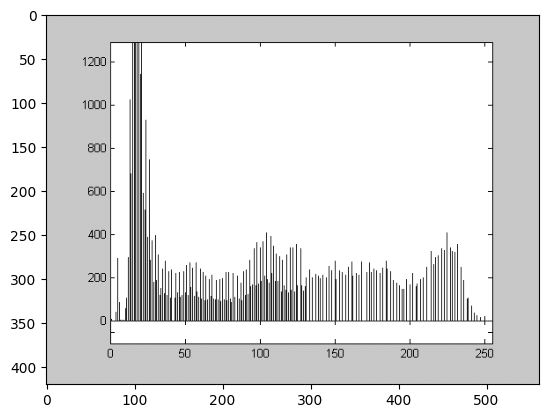

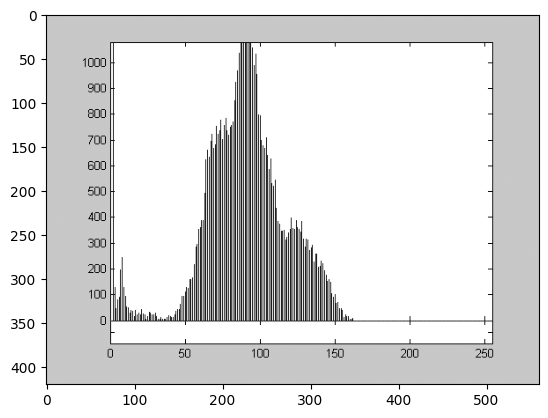

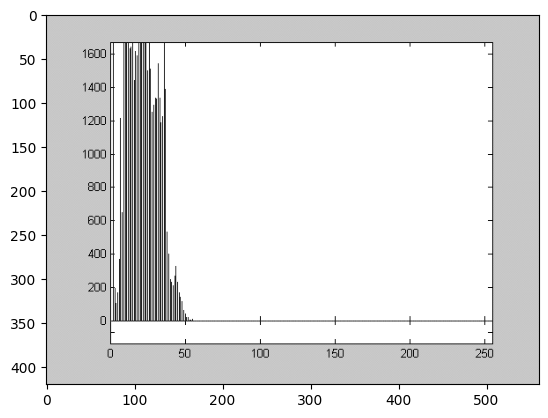

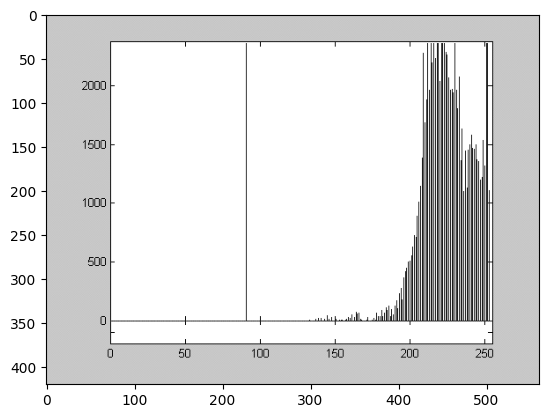

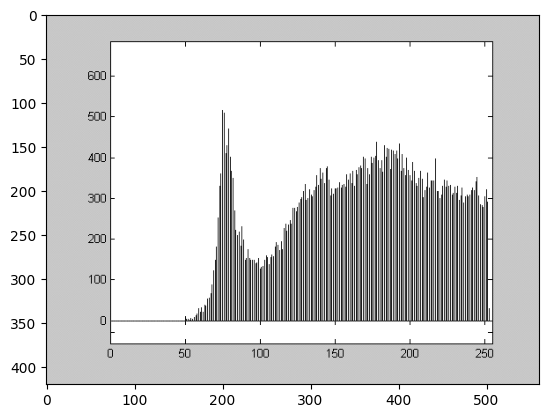

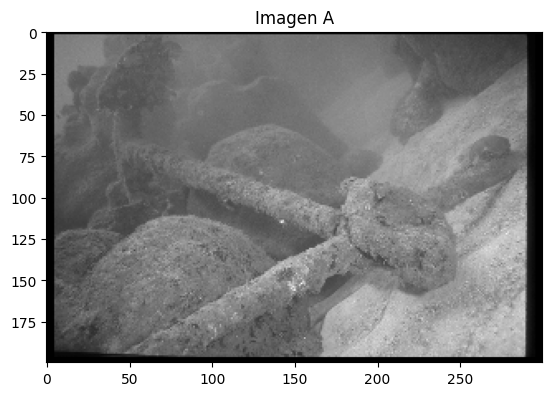

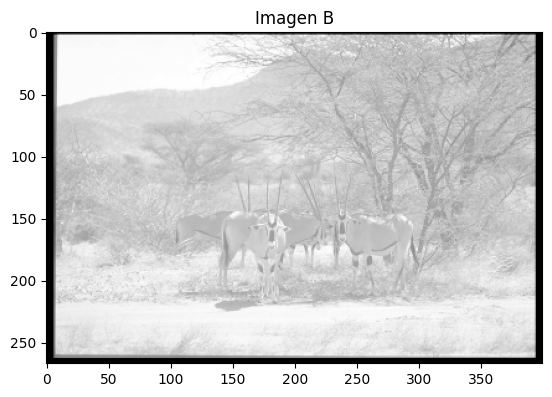

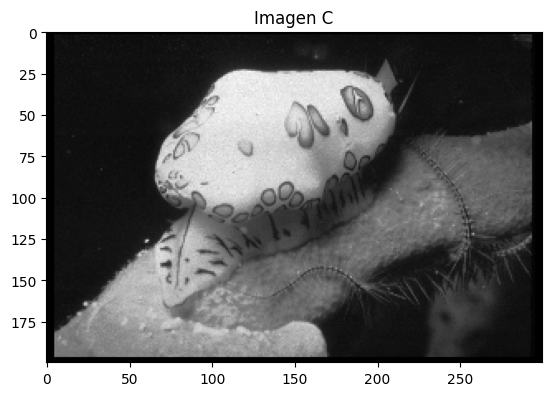

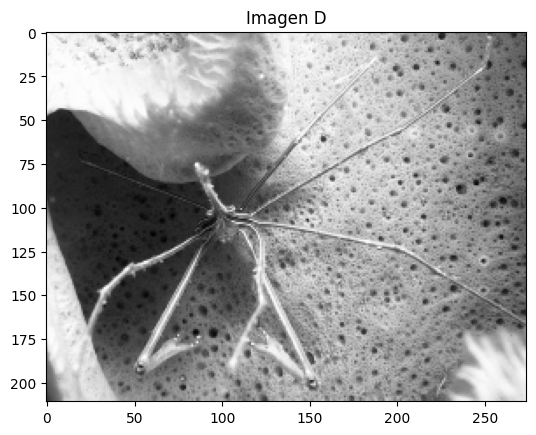

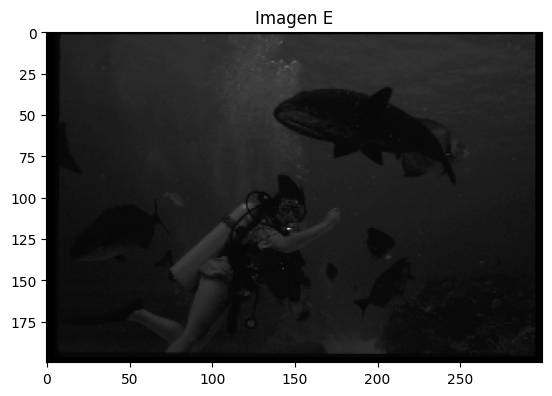

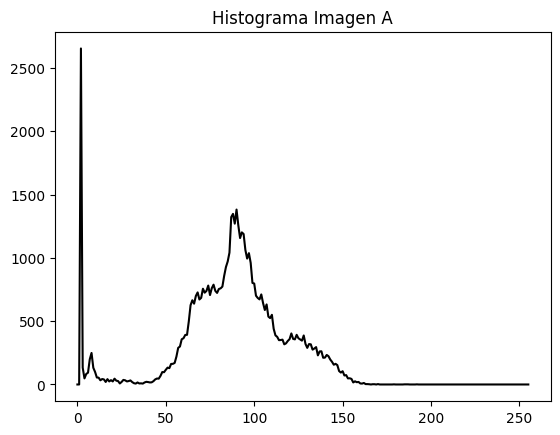

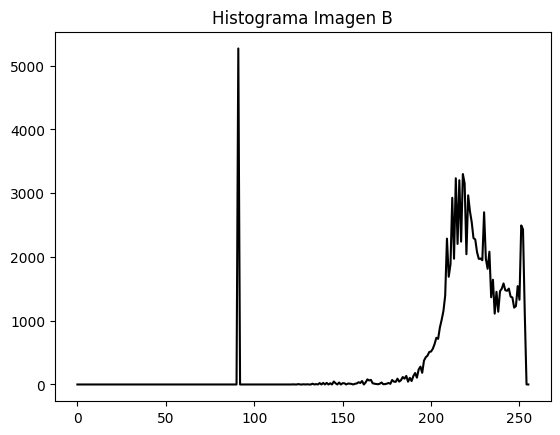

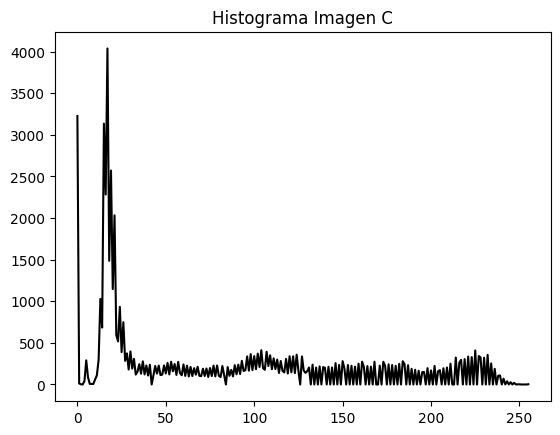

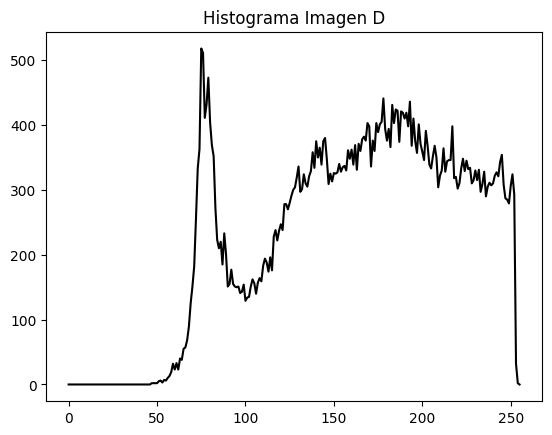

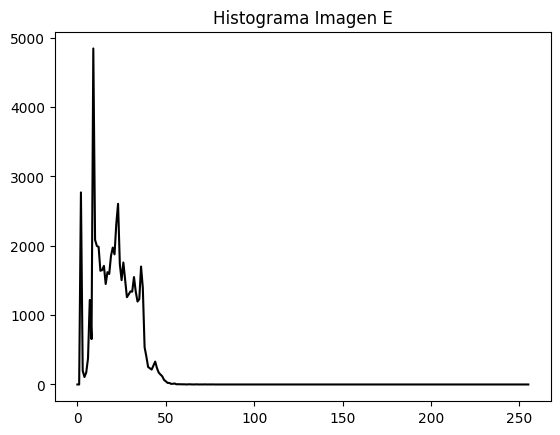

'Media: Brillo promedio.\n\nVarianza: Contraste (cuánto se alejan los valores de la media).\n\nAsimetría: Si los tonos tienden hacia oscuros (<0) o claros (>0).\n\nEnergía: Medida de uniformidad. Alta cuando hay pocos tonos dominantes.\n\nEntropía: Grado de aleatoriedad. Más alta cuando hay más diversidad de niveles.'

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

ruta_base = 'C:\\Users\\pablo\\Desktop\\PDI\\PDI\\Imagenes\\'  
histo  = []
for i in range(1, 6):
    nombre_archivo = f'histo{i}.tif'
    path_completo = ruta_base + nombre_archivo
    imagen = cv.imread(path_completo, cv.IMREAD_GRAYSCALE)
    
    if imagen is not None:
        histo.append(imagen)
    else:
        print(f'No se pudo cargar {path_completo}')
for i in range(0,5):
    plt.figure(i)
    plt.imshow(histo[i], cmap='gray')

#Histograma 1 tiene un pico en las intensidades bajas por lo que es mas oscura,
#y todas las otras intensidades de grises tienen valores equilibrados por lo que tiene buen contraste
#Histograma 2 es media oscura (nivel de gris cercano a 100) y con poco constraste
#Histograma 3 es muy oscura y con poco contraste
#Histograma 4 es muy clara y con poco contraste
#Histograma 5 es clara y con contraste medio
imagenes  = []
nombres = ['A', 'B', 'C', 'D', 'E']  # Letras que identifican las imágenes

for letra in nombres:
    nombre_archivo = f'imagen{letra}.tif'
    path_completo = ruta_base + nombre_archivo
    imagen = cv.imread(path_completo, cv.IMREAD_GRAYSCALE)
    
    if imagen is not None:
        imagenes.append(imagen)
    else:
        print(f'No se pudo cargar {path_completo}')

for i in range(len(imagenes)):
    plt.figure(i+5)
    plt.imshow(imagenes[i], cmap='gray')
    plt.title(f'Imagen {nombres[i]}')

#A-2
#B-4
#C-1       
#D-5
#E-3

for i in range(len(imagenes)):
    histo = cv.calcHist([imagenes[i]], [0], None, [256], [0, 256])
    hist_norm = histo / histo.sum()
    niveles = np.arange(256)

    media = np.sum(niveles * hist_norm[:,0])
    varianza = np.sum(((niveles - media) ** 2) * hist_norm[:, 0])
    asimetria = np.sum(((niveles - media) ** 3) * hist_norm[:, 0]) / (varianza ** 1.5)
    energia = np.sum(hist_norm[:, 0] ** 2)
    # Evitar log(0) usando un pequeño epsilon
    epsilon = 1e-10
    entropia = -np.sum(hist_norm[:, 0] * np.log2(hist_norm[:, 0] + epsilon))

    print(f' Imagen {i + 1}:')
    print(f'  Media:     {media:.2f}')
    print(f'  Varianza:  {varianza:.2f}')
    print(f'  Asimetría: {asimetria:.2f}')
    print(f'  Energía:   {energia:.4f}')
    print(f'  Entropía:  {entropia:.4f}\n')   
    plt.figure(i+10)
    plt.plot(histo, color='black')
    plt.title(f'Histograma Imagen {nombres[i]}')
plt.show()
#LE PEGUE A TODOS 

'''Media: Brillo promedio.

Varianza: Contraste (cuánto se alejan los valores de la media).

Asimetría: Si los tonos tienden hacia oscuros (<0) o claros (>0).

Energía: Medida de uniformidad. Alta cuando hay pocos tonos dominantes.

Entropía: Grado de aleatoriedad. Más alta cuando hay más diversidad de niveles.'''

# Guía 3 - Ejercicio 4.2



In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

mariposa = cv.imread(r'C:\Users\pablo\Desktop\PDI\PDI\Imagenes\mariposa02.png',cv.IMREAD_GRAYSCALE)
flores = cv.imread(r'C:\Users\pablo\Desktop\PDI\PDI\Imagenes\flores02.jpg',cv.IMREAD_GRAYSCALE)
lapices = cv.imread(r'C:\Users\pablo\Desktop\PDI\PDI\Imagenes\lapices02.jpg',cv.IMREAD_GRAYSCALE)
plt.figure(0)
plt.subplot(1,2,1)
mariposa_gaus = cv.GaussianBlur(mariposa, (5, 5), 1)
mariposa_suave = cv.boxFilter(mariposa,-1,(7,7),normalize=True)

plt.imshow(mariposa_suave, cmap='gray')
plt.title('Mariposa boxFilter 7x7')
plt.subplot(1,2,2)
mariposa_bilateral = cv.bilateralFilter(mariposa, 9, 75, 75)
plt.imshow(mariposa_bilateral, cmap='gray')
plt.title('Mariposa bilateral')


plt.figure(1)
plt.subplot(1,2,1)
flores_suave = cv.boxFilter(flores,-1,(7,7),normalize=True)
plt.imshow(flores_suave, cmap='gray')
plt.title('Flores boxFilter 7x7')
plt.subplot(1,2,2)
flores_bilateral = cv.bilateralFilter(flores, 9, 75, 75)
plt.imshow(flores_bilateral, cmap='gray')
plt.title('Flores bilateral')

plt.figure(2)
plt.subplot(1,2,1)
lapices_suave = cv.boxFilter(lapices,-1,(7,7),normalize=True)
plt.imshow(lapices_suave, cmap='gray')
plt.title('Lapices boxFilter 7x7')
plt.subplot(1,2,2)
lapices_bilateral = cv.bilateralFilter(lapices, 9, 75, 75)
plt.imshow(lapices_bilateral, cmap='gray')
plt.title('Lapices bilateral')

plt.show()

# Elegir una fila para el perfil (puede cambiarse)
fila = flores.shape[0] // 2  # Fila central de la imagen
# Obtener los perfiles
perfil_original = flores[fila, :]
perfil_box = flores_suave[fila, :]
perfil_bilateral = flores_bilateral[fila, :]

# Graficar los perfiles
plt.figure(figsize=(10, 5))
plt.plot(perfil_original, label='Original', color='black')
plt.plot(perfil_box, label='Box Filter', color='blue')
plt.plot(perfil_bilateral, label='Bilateral Filter', color='red')
plt.title(f'Perfiles de grises - Fila {fila}')
plt.xlabel('Columna')
plt.ylabel('Nivel de gris')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


El filtro bilateral es una técnica de suavizado no lineal que se utiliza para 
reducir el ruido en una imagen sin perder bordes importantes. 
Esto lo diferencia de otros filtros como el Gaussiano o el de mediana, 
que tienden a borrar los detalles en los bordes.'''

'''
Comparación | Box Filter | Filtro Bilateral
Suavizado general | Bueno, pero borra detalles finos | Bueno, mantiene más nitidez
Conservación de bordes | Baja | Alta (mantiene contornos bien definidos)
Rendimiento | Más rápido | Más lento (procesamiento no lineal)
Ideal para | Reducción básica de ruido | Procesamiento facial, bordes, arte'''

'''
En el gráfico se observan los perfiles de grises correspondientes a la misma fila de tres versiones de una imagen:

Perfil negro (Original): muestra variaciones abruptas de intensidad,
lo cual refleja la presencia de detalles y bordes marcados.

Perfil azul (Box Filter): presenta un perfil más suavizado con menor variación, 
lo que evidencia una reducción del ruido pero también una pérdida de detalles finos. El suavizado es uniforme y afecta tanto regiones planas como bordes.

Perfil rojo (Filtro Bilateral): logra una suavización efectiva sin alejarse 
demasiado del perfil original, especialmente en los bordes. 
Esto indica que preserva mejor los detalles mientras reduce el ruido en las 
zonas homogéneas.

# Guía 4 - Ejercicio 5.2





### Carga de librerías y lectura de imágenes

In [ ]:
import numpy as np
import cv2 as cv
import sys
from matplotlib import pyplot as plt

img=cv.imread("imagenes/Deforestacion.png")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

## Detección automática de la zona de interés
La zona de interés aparece como un rectángulo blanco en la imagen original y hay que recortarla. Para ello, primero se cuantiza la imagen en escala de grises en dos niveles, de modo que lo blanco (y gris muy claro) se mantenga blanco y todo lo demás se vuelva negro.

In [ ]:
img_white = np.where(img_gray > 230, 255, 0)

Una vez cuantizada, se calculan los perfiles de intensidad de las columnas y filas. Esto da como resultados dos arreglos, cuyos valores se normalizan y se cuantizan en dos valores para obtener de forma clara las posiciones en las que se encuentra el borde.

In [ ]:
# Obtener perfiles de intensidad de columnas y filas normalizados
row_intensity_profile = np.mean(img_white, axis=1)
row_intensity_min = np.min(row_intensity_profile)
row_intensity_profile -= row_intensity_min
row_intensity_max = np.max(row_intensity_profile)
row_intensity_profile = row_intensity_profile/row_intensity_max

col_intensity_profile = np.mean(img_white, axis=0)
col_intensity_min = np.min(col_intensity_profile)
col_intensity_profile -= col_intensity_min
col_intensity_max = np.max(col_intensity_profile)
col_intensity_profile = col_intensity_profile/col_intensity_max

# Cuantizar en dos valores para definir bordes
row_intensity_profile = np.pow(row_intensity_profile,3)
row_intensity_profile = np.where(row_intensity_profile > 0.5, 1, 0)

col_intensity_profile = np.pow(col_intensity_profile,3)
col_intensity_profile = np.where(col_intensity_profile > 0.5, 1, 0)

Una vez que se tienen en estos arreglos valores 1 y 0, la zona de interés comienza cuando se da el primer cambio entre un elemento con valor 1 (blanco) a 0 (negro). A su vez, la zona de interés termina cuando se da el último cambio entre un elemento con valor 0 (negro) a 1 (blanco).

In [ ]:
# Encontrar índices del perfil de intensidad donde el valor es 1 y el siguiente es 0
row_edges_10 = np.where((row_intensity_profile[:-1] == 1) & (row_intensity_profile[1:] == 0))[0]
col_edges_10 = np.where((col_intensity_profile[:-1] == 1) & (col_intensity_profile[1:] == 0))[0]

# Encontrar índices del perfil de intensidad donde el valor es 0 y el siguiente es 1
row_edges_01 = np.where((row_intensity_profile[:-1] == 0) & (row_intensity_profile[1:] == 1))[0]
col_edges_01 = np.where((col_intensity_profile[:-1] == 0) & (col_intensity_profile[1:] == 1))[0]

# Recortar la zona de interés
x_0 = col_edges_10[0]+1
x_1 = col_edges_01[-1]
y_0 = row_edges_10[0]+1
y_1 = row_edges_01[-1]
img_roi = img[y_0:y_1,x_0:x_1].copy()

## Detección del tamaño de la escala
Con la escala sucede lo mismo pero en negro. Primero se cuantiza la imagen en escala de grises en dos niveles, de modo que lo negro se vuelva blanco y todo lo demás se vuelva negro.

In [ ]:
img_black = np.where(img_gray < 5, 255, 0)

Luego se realiza el cálculo con los perfiles de intensidad de las filas. De esta forma, se puede descartar la parte de la imagen que contiene la escala en millas.

In [ ]:
# Obtener perfiles de intensidad de filas normalizados
row_intensity_profile = np.mean(img_black, axis=1)
row_intensity_min = np.min(row_intensity_profile)
row_intensity_profile -= row_intensity_min
row_intensity_max = np.max(row_intensity_profile)
row_intensity_profile = row_intensity_profile/row_intensity_max

# Cuantizar en dos valores para definir bordes
row_intensity_profile = np.pow(row_intensity_profile,3)
row_intensity_profile = np.where(row_intensity_profile > 0.5, 1, 0)

# Encontrar índices del perfil de intensidad donde el valor es 0 y el siguiente es 1
row_edges_01 = np.where((row_intensity_profile[:-1] == 0) & (row_intensity_profile[1:] == 1))[0]

# Recortar imagen hasta la línea horizontal de la escala
img_black = img_black[0:row_edges_01[0],0:img_black.shape[1]].copy()

Ahora sí, se procede a realizar el mismo cálculo pero para las columnas.

In [ ]:
# Obtener perfiles de intensidad de columnas normalizados
col_intensity_profile = np.mean(img_black, axis=0)
col_intensity_min = np.min(col_intensity_profile)
col_intensity_profile -= col_intensity_min
col_intensity_max = np.max(col_intensity_profile)
col_intensity_profile = col_intensity_profile/col_intensity_max

# Cuantizar en dos valores para definir bordes
col_intensity_profile = np.pow(col_intensity_profile,3)
col_intensity_profile = np.where(col_intensity_profile > 0.5, 1, 0)

# Encontrar índices del perfil de intensidad donde el valor es 1 y el siguiente es 0
col_edges_10 = np.where((col_intensity_profile[:-1] == 1) & (col_intensity_profile[1:] == 0))[0]

# Encontrar índices del perfil de intensidad donde el valor es 0 y el siguiente es 1
col_edges_01 = np.where((col_intensity_profile[:-1] == 0) & (col_intensity_profile[1:] == 1))[0]

En base a esto, se puede calcular el tamaño de la escala y el área de cada píxel individual.

In [ ]:
# 200 m en la imagen corresponden a scale_pixels
scale_length = col_edges_10[0]+1 - col_edges_01[-1]
pixel_length = 200 / scale_length
pixel_area = pixel_length**2

## Ver zona deforestada
Primero, se descompone la imagen en canales RGB y HSV. Se identificó que el canal R representa mejor la deforestación. Por lo tanto, se le aplican filtros de suavizado para evitar que se identifiquen partes de árboles iluminados como sectores deforestados. Además, se calcula el histograma.

In [ ]:
b,g,r = cv.split(img_roi)
h,s,v = cv.split(cv.cvtColor(img_roi,cv.COLOR_BGR2HSV))

# Aplicar un filtro de caja a la componente r
r = cv.boxFilter(r, ddepth=-1, ksize=(3, 3))

# Aplicar un filtro de mediana a la componente r
r = cv.medianBlur(r, 19)

# Calcular el histograma
hist_r = cv.calcHist([r], [0], None, [256], [0, 256])

Se identifica un valle en el histograma en el valor 76, que puede representar un cambio en la forestación. Tomando este valor como *threshold* se cuantiza la imagen filtrada para definir los límites duros de la deforestación. Esto da como resultado una máscara que se aplica para colorear en rojo la deforestación en la imagen original.

In [ ]:
deforestacion = np.where(r > 76, 255, 0).astype(np.uint8)
deforestacion = cv.cvtColor(deforestacion.astype(np.uint8), cv.COLOR_GRAY2BGR)

# Colorear en la zona de interes en rojo la deforestación
img_roi[deforestacion[:,:,0] == 255] = [0, 0, 255]

## Cálculo del tamaño de la zona deforestada
- El **área de la zona de interés** se calcula como el tamaño en píxeles de la imagen recortada, multiplicado por el área de un píxel.
- El **área deforestada** se calcula contando la cantidad de píxeles blancos en la imagen cuantizada de deforestación y multiplicando por el área de un píxel.
- El **área de monte** es simplemente el área de la zona de interés menos el área deforestada.

In [ ]:
roi_area = img_roi.shape[0] * img_roi.shape[1] * pixel_area
deforestacion_area = np.sum(deforestacion[:,:,0] == 255) * pixel_area
monte_area = roi_area - deforestacion_area

# 1 ha = 10,000 m^2
print("Área de la zona de interés: ", roi_area/10000, "ha")
print("Área de la deforestación: ", deforestacion_area/10000, "ha")
print("Área de la zona con monte: ", monte_area/10000, "ha")

Área de la zona de interés:  119.84542929597876 ha
Área de la deforestación:  20.141528800869466 ha
Área de la zona con monte:  99.7039004951093 ha


## Muestra de imágenes
Por último, se muestran las imágenes.

In [ ]:
# Imagen original
cv.imshow("img",img)

'''img_white = cv.cvtColor(img_white.astype(np.uint8), cv.COLOR_GRAY2BGR)
cv.imshow("img_white",img_white)'''

'''img_black = cv.cvtColor(img_black.astype(np.uint8), cv.COLOR_GRAY2BGR)
cv.imshow("img_black",img_black)'''

'''fig, ax = plt.subplots(nrows=2,ncols=3)
ax[0,0].imshow(b)
ax[0,1].imshow(g)
ax[0,2].imshow(r) 
ax[1,0].imshow(h)
ax[1,1].imshow(s)
ax[1,2].imshow(v)
plt.show()'''

# Imagen de la zona de interés
cv.imshow("img_roi",img_roi)

# Imagen de la deforestación
cv.imshow("deforestacion",deforestacion)

cv.waitKey(0)
cv.destroyAllWindows()

# Guía 4 - Ejercicio 4 (opcional)



In [ ]:
import numpy as np
import cv2 as cv

def seleccionar_roi(img):
    img_copia = img.copy()
    rect = cv.selectROI("Seleccioná la ROI y presioná ENTER o SPACE", img_copia, showCrosshair=True)
    cv.destroyWindow("Seleccioná la ROI y presioná ENTER o SPACE")
    x, y, w, h = rect
    roi = img[y:y+h, x:x+w]
    return roi, rect

def definir_elipsoide(roi, img, a, b, c):
    mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    b_roi, g_roi, r_roi = cv.split(roi)
    b_p = np.mean(b_roi)
    g_p = np.mean(g_roi)
    r_p = np.mean(r_roi)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            b, g, r = img[i, j]
            if ((r - r_p)**2 / (a**2 + 1e-5) +
                (g - g_p)**2 / (b**2 + 1e-5) +
                (b - b_p)**2 / (c**2 + 1e-5)) <= 1:
                mask[i, j] = 255
            else:
                mask[i, j] = 0
    return mask

def definir_rectangulo(roi, img, a, b):
    # Convertimos ROI e imagen completa a HSV
    hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)
    hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    # Calculamos los promedios de H y S en la ROI
    h_roi, s_roi, _ = cv.split(hsv_roi)
    h_p = np.mean(h_roi)
    s_p = np.mean(s_roi)

    # Definimos los rangos con tolerancias a y b
    h_min = max(0, int(h_p - a))
    h_max = min(179, int(h_p + a))  # H está entre 0 y 179
    s_min = max(0, int(s_p - b))
    s_max = min(255, int(s_p + b))  # S está entre 0 y 255

    # Creamos la máscara usando solo H y S
    lower = np.array([h_min, s_min, 0])
    upper = np.array([h_max, s_max, 255])
    mask = cv.inRange(hsv_img, lower, upper) 
    h, s, v = cv.split(hsv_img)
    cond_h = (h >= h_min) & (h <= h_max)
    cond_s = (s >= s_min) & (s <= s_max)

    # Solo filtramos por H y S como en tu ejemplo
    mask = np.uint8(cond_h & cond_s) * 255




    #Para cada píxel (h, s, v) de hsv_img, comprueba: 
    #H_min ≤ h ≤ H_max  AND  S_min ≤ s ≤ S_max  AND  V_min ≤ v ≤ V_max
    #Si todas las comparaciones son verdaderas, la máscara en esa posición vale 255; si alguna falla, vale 0.

    return mask


def nothing(x):
    pass

# Cargar imagen y seleccionar ROI
img = cv.imread(r'C:\Users\pablo\Desktop\PDI\PDI\Imagenes\futbol.jpg')  
roi, rect = seleccionar_roi(img)

# Crear ventana con trackbars
cv.namedWindow("Segmentación Rectángulo (HSV)", cv.WINDOW_NORMAL)
cv.createTrackbar("a (H)", "Segmentación Rectángulo (HSV)", 100, 300, nothing)
cv.createTrackbar("b (S)", "Segmentación Rectángulo (HSV)", 100, 300, nothing)

cv.namedWindow("Segmentación Elipsoide (RGB)", cv.WINDOW_NORMAL)
cv.createTrackbar("a (R)", "Segmentación Elipsoide (RGB)", 100, 300, nothing)
cv.createTrackbar("b (G)", "Segmentación Elipsoide (RGB)", 100, 300, nothing)
cv.createTrackbar("c (B)", "Segmentación Elipsoide (RGB)", 100, 300, nothing)

while True:
    # Obtener los valores de los trackbars
    a_h = cv.getTrackbarPos("a (H)", "Segmentación Rectángulo (HSV)")  # H
    b_s = cv.getTrackbarPos("b (S)", "Segmentación Rectángulo (HSV)")  # S
    a_r = cv.getTrackbarPos("a (R)", "Segmentación Elipsoide (RGB)")  # R
    b_g = cv.getTrackbarPos("b (G)", "Segmentación Elipsoide (RGB)")  # G
    c_b = cv.getTrackbarPos("c (B)", "Segmentación Elipsoide (RGB)")  # B

    # Calcular la máscara para el rectángulo en HSV
    mask_rect = definir_rectangulo(roi, img, a_h, b_s)
    resultado_rect = cv.bitwise_and(img, img, mask=mask_rect)

    # Calcular la máscara para el elipsoide en RGB
    mask_ellipse = definir_elipsoide(roi, img, a_r, b_g, c_b)
    resultado_ellipse = cv.bitwise_and(img, img, mask=mask_ellipse)

    # Mostrar ambas imágenes: una con la segmentación HSV y otra con la segmentación RGB
    cv.imshow("Segmentación Rectángulo (HSV)", resultado_rect)
    cv.imshow("Segmentación Elipsoide (RGB)", resultado_ellipse)
    
    key = cv.waitKey(1)
    if key == 27:  # ESC para salir
        break

cv.destroyAllWindows()








########-------------------------#####################3
img = cv.imread(r'C:\Users\pablo\Desktop\PDI\PDI\Imagenes\s03_i10_H_DM.png')  
# Crear ventana con trackbars
cv.namedWindow("Segmentación Rectángulo (HSV)", cv.WINDOW_NORMAL)
cv.createTrackbar("a (H)", "Segmentación Rectángulo (HSV)", 100, 300, nothing)
cv.createTrackbar("b (S)", "Segmentación Rectángulo (HSV)", 100, 300, nothing)

cv.namedWindow("Segmentación Elipsoide (RGB)", cv.WINDOW_NORMAL)
cv.createTrackbar("a (R)", "Segmentación Elipsoide (RGB)", 100, 300, nothing)
cv.createTrackbar("b (G)", "Segmentación Elipsoide (RGB)", 100, 300, nothing)
cv.createTrackbar("c (B)", "Segmentación Elipsoide (RGB)", 100, 300, nothing)

while True:
    # Obtener los valores de los trackbars
    a_h = cv.getTrackbarPos("a (H)", "Segmentación Rectángulo (HSV)")  # H
    b_s = cv.getTrackbarPos("b (S)", "Segmentación Rectángulo (HSV)")  # S
    a_r = cv.getTrackbarPos("a (R)", "Segmentación Elipsoide (RGB)")  # R
    b_g = cv.getTrackbarPos("b (G)", "Segmentación Elipsoide (RGB)")  # G
    c_b = cv.getTrackbarPos("c (B)", "Segmentación Elipsoide (RGB)")  # B

    # Calcular la máscara para el rectángulo en HSV
    mask_rect = definir_rectangulo(roi, img, a_h, b_s)
    resultado_rect = cv.bitwise_and(img, img, mask=mask_rect)

    # Calcular la máscara para el elipsoide en RGB
    mask_ellipse = definir_elipsoide(roi, img, a_r, b_g, c_b)
    resultado_ellipse = cv.bitwise_and(img, img, mask=mask_ellipse)

    # Mostrar ambas imágenes: una con la segmentación HSV y otra con la segmentación RGB
    cv.imshow("Segmentación Rectángulo (HSV)", resultado_rect)
    cv.imshow("Segmentación Elipsoide (RGB)", resultado_ellipse)
    
    key = cv.waitKey(1)
    if key == 27:  # ESC para salir
        break

cv.destroyAllWindows()




error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2564: error: (-27:Null pointer) NULL window: 'Segmentación Rectángulo (HSV)' in function 'cvGetTrackbarPos'


: 

Comparando los dos métodos, se nota que la segmentación usando H y S funciona mejor. Esto es porque el modelo HSV separa mejor el color de la iluminación, entonces aunque haya sombras o luz diferente, el color que queremos seguir no cambia tanto. En RGB, en cambio, cualquier cambio de luz afecta los tres canales y la segmentación se vuelve mucho menos precisa. Por eso, trabajando en HSV se logra una máscara mucho más limpia y enfocada en el objeto de interés.

¿Qué método le parece mejor?
Me parece que el método basado en HSV es mejor, como mencioné anteriormente, ya que permite separar mejor los colores, especialmente cuando se trata de tonos de piel.

¿Es posible obtener un conjunto de valores óptimo para todas las imágenes?
Es posible. Habría que encontrar valores promedio que funcionen bien para una amplia gama de tonos de piel, lo cual puede requerir pruebas sobre muchas imágenes.

¿Es suficiente aplicar la segmentación sin métodos de pre-procesamiento (realce o filtrado)?
En el ejercicio anterior logré buenos resultados sin aplicar pre-procesamiento. Sin embargo, el uso de técnicas como realce o filtrado puede facilitar la segmentación y mejorar notablemente la calidad del resultado.

¿Dónde cree usted que están los mayores inconvenientes?
Los mayores inconvenientes aparecen cuando hay mucha variación entre los individuos, especialmente en los tonos de piel. También puede ser problemático si la vestimenta no genera suficiente contraste con la piel.

¿Qué condiciones observa en la escena que son homogéneas y cuáles heterogéneas?
Algunas condiciones parecen bastante homogéneas, como la distancia entre la cámara y los sujetos o el enfoque. En cambio, hay bastante heterogeneidad en la iluminación, el fondo de la escena, las poses de los sujetos y especialmente en los colores de piel y vestimenta.

A partir de estos análisis, ¿podría usted generar una lista de consideraciones útiles para generar una base de datos de imágenes?
Sí. Para construir una buena base de datos de imágenes, es importante mantener condiciones consistentes: usar una iluminación uniforme y controlada, evitar fondos con colores similares al objeto de interés, mantener una distancia y enfoque constantes, y procurar que los sujetos tengan poses similares y no utilicen accesorios que interfieran con el análisis del color. Usar fondos neutros también ayuda mucho para facilitar la segmentación.

